Some of the challenges with the dataset are as follows:

* Large number of features: The data set has over 450 features. Hence selecting the right features for the model is very critical and at the same time it is not easy as the same traditional ways of removing features is not effective given the large number of features. Apart from feature selection, feature extraction (creating your own features using the existing features) is also not easy in this case.

* Sparsity of the dataset: There are a lot of features with a large number of null values.

* Data imbalance: For developing a classification, there is a huge imbalance in the training dataset with only approximately 5000 values for one category as compared to over 95,000 instances for the other category.


## Loading libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading data

In [2]:
data = pd.read_csv('learningSet.csv')
data.shape

(95412, 481)

## Basic EDA

Let's see what we have in the variable "TARGET_B"

In [3]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

This is a **HUGE** class imbalance




Now let's see what happens with "TARGET_D"

In [4]:
data['TARGET_D']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
95407     0.0
95408     0.0
95409     0.0
95410    18.0
95411     0.0
Name: TARGET_D, Length: 95412, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


As you can see we have over 400 columns. Hence we cannot use our traditional methods to eliminate features that are not sifnificant, it will the a never ending story.

## Dropping some columns

There are a lot of columns that have a very high percentage of **null values**. It is a highly sparse dataset. 

We can decide on a threshold and then remove those variables. There is no rule of thumb to decide on this threshold value. Sometimes it can as low as 25%-30%. Sometimes in some data sets you might find that even though there are more than 50% missing values in a column, you might have to include that variable in your analysis.
 
A lot of it depends on the business context as well. In this case we will take this threshold to be 25% and then check the definitions of the columns filtered, to see if there is any column that we might want to keep

In [6]:
def filter_nulls(df, perc = .25):
  ''' This function gets a dataframe, inspects the percentage of null values in each column 
      and returns a list of those columns which has a percentage above the threshold value 
      provided by the user. A default percentage value of 25% is assumed unless another value
      is provided in the function arguments.
      Inputs: 
        df: a dataframe to inspec
        [perc]: percentage of null values in each column
      Outputs:
        list of columns which have a percentage of null values above the specified thershold.
  '''
  nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()  
  nulls_percent_df.columns = ['column_name', 'nulls_percentage']
  columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>perc]
  drop_columns_list = list(columns_above_threshold['column_name'])
  return drop_columns_list

In [7]:
drop_columns_list = filter_nulls(data)
drop_columns_list

['NUMCHLD',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_17',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24']

However, from the list above that includes the columns that have over 25% null values, your manager told you that the following columns are important -> wealth1, wealth2. We will remove these variables from the above list.

On the other hand, RDATE3, RAMNT_3 are important but they have too many null values.



In [8]:
cols = ['WEALTH1', 'WEALTH2']
for item in cols:
    drop_columns_list.remove(item)  

In [9]:
data = data.drop(columns=drop_columns_list)
data.shape

(95412, 411)

## Reviewing the dataset

In [10]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83

We can see that there are a lot of columns that have blank spaces which represent no value in this case. They were not identified as null values by python as they are empty spaces that are read as character values by python. We will replace those values by NaNs and repeat the analysis.

But before you do that , please check the definition of the variable "MAILCODE" in the **variables_description.md** file. You will notice that blanks in that case mean that the adress is okay. So we will we will have to replace the blank values from the column "MAILCODE" by "A" which would mean the address is okay

In [11]:
data['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [12]:
data['MAILCODE'].unique()

array([' ', 'B'], dtype=object)

In [13]:
#data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))
data['MAILCODE'] = np.where(data['MAILCODE'] == " ","A",data['MAILCODE'])

Let's see if everything is correct

In [14]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,,5202,0,,,,,XXXX,S1,14,46.0,E,H,,,,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,,,,9.0,2,,,,,,,,,,,,,,,,,,,,,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,

Now let's replace the remaining spaces in the dataset by NA's

In [15]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

## Computing percentage of null values again

Now let's compute again the columns for which the percentage of null values is above a given value.

In [16]:
drop_columns_list = filter_nulls(data)
drop_columns_list

['PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'AGEFLAG',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'WEALTH1',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'RFA_5',
 'RFA_10',
 'RFA_13',
 'RFA_15',
 'RFA_17',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

Like last time we will keep the following -> wealth1, wealth2
along with these VETERANS, SOLIH as our mannager forgot to mention that we also need to keep the last two columns.

In [17]:
cols = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']
for item in cols:
    drop_columns_list.remove(item) 

In [18]:
data = data.drop(columns=drop_columns_list)
data.shape

(95412, 368)

In [19]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,VETERANS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,3712,0,XXXX,T2,36,60.0,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,5.0,NaN,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,5202,0,XXXX,S1,14,46.0,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,9.0,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92

## Separating Target, Numerical Features, and Categorical Features

Let's start with the dependent features

In [20]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


Now let's obtain the numerical ones.

In [21]:
numerical = data.select_dtypes(np.number)
# Just in case.
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

## Working with the categorical features

We will work with the categorical features first. Look at the columns one by one. Some of the operations which we will perform are:

*  Replace null values with the most occuring categories.

*  Reduce the number of categories in a column by grouping.

It is important to note that these are the columns that are read by python by default as categorical / object types. **There might be other columns that would have been read as numerical but we would want them as categorical**. We will take a look at them later when we work on numerical types

In [22]:
categorical = data.select_dtypes(np.object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A


Now, let's remember how many NA's we have in the categorical columns.

In [23]:
categorical.isna().sum()

OSOURCE       928
STATE           0
ZIP             0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
HOMEOWNR    22228
GENDER       2957
DATASRCE    21280
SOLIH       89212
VETERANS    84986
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_14      18867
RFA_16      20417
RFA_18      21263
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

We can exclude some categorical columns:

* OSOURCE - Symbol definitions not provided, too many categories.

* TCODE - Title of person - not significant - too many categories too. 

* ZIP CODE - we are including state already, kind of redundant.

In [24]:
data['TCODE'].value_counts()

0        40917
1        25691
2        17006
28        8258
1002      1861
3          835
4          367
28028       71
72          63
980         54
13          45
4002        44
14          22
45          17
116         17
18          17
42          15
22          13
39002       11
24          11
13002        7
30           7
228          5
6            5
136          5
23           5
202          4
21           3
14002        2
6400         2
134          2
9            2
4004         2
94           2
100          2
18002        2
17           2
58002        1
7            1
93           1
50           1
47           1
96           1
44           1
27           1
25           1
40           1
22002        1
38           1
24002        1
72002        1
12           1
76           1
36           1
61           1
Name: TCODE, dtype: int64

As we can see, we can't drop 'TCODE' because even thoguht is categorical, it has been codified as numerical and therefore it will not appear on the categoricals. 

**BEWARE!!**

In [25]:
drop_list = ['OSOURCE','ZIP']
categorical.drop(columns=drop_list,axis=1,inplace=True)

## Percentage of NA's again

Let's identify columns which have a percentage of NA's above 85%

In [26]:
categoricals_to_drop = filter_nulls(data,perc=0.85)
categoricals_to_drop

['SOLIH', 'VETERANS']

## Reducing number of levels in categorical columns

Here we will try to reduce the number of levels in categorical columns. An ideal way would have been to group the states into regions. But in this case we will group all the states with counts less than 2500 into one category "other"

In [27]:
def clean_state(df, thr = 2500):
    ''' This function will pick a dataframe and it will check out the frequencies of the 'STATE'
        column. If the frequency of a given state is less than a given threshold 'thr', the this
        state will be included into another group called "other". The function assumes a threshold
        value of 2500 unless another value is provided in the function call.
        Inputs: 
            df: dataframe 
            [thr]: threshold frequency value to iinclude a state in the group "other"
        Output:
            df: dataframe with the 'STATE' grouped.
    ''' 
    df2 = pd.DataFrame(df['STATE'].value_counts()).reset_index()
    df2.columns = ['state', 'count']
    other_states = list(df2[df2['count'] < thr]['state'])

    df['STATE'] = np.where(df['STATE'].isin(other_states),"other",df['STATE'])

    return df

In [28]:
categorical = clean_state(categorical, thr = 2500)
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

## Cleaning 'GENDER'

In [29]:
def clean_gender(df):
    '''This function will checkout the column 'GENDER' from a given dataframe 
       and it will replace the NA's or blankds by "other"
       Input:
         df: dataframe to perform the cleanup
       Output:
         df: dataframe with the 'GENDER' column values according to the new specficications.
    ''' 
        
    df2 = df.copy()
    df2['GENDER'] = np.where(df2['GENDER'].isin(['F','M']),df2['GENDER'],"other")

    return df2

In [30]:
categorical = clean_gender(categorical)
categorical['GENDER'].value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

# Lesson 1

We will work on the column "DOMAIN". We will first replace the null values with the category that is represented the most and then we will split the data into two columns "DOMAIN_A" and "DOMAIN_B".

DOMAIN_A will consist of the first character from DOMAIN

DOMAIN_B will consist of the second character from DOMAIN

Then we will drop the original column "DOMAIN"

In [31]:
categorical['DOMAIN'].value_counts(sort=True)

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [32]:
categorical['DOMAIN'].value_counts(sort=True).reset_index()

,index,DOMAIN
0,R2,13623
1,T2,12369
2,S1,11503
3,S2,8530
4,C2,8264
5,C1,6145
6,C3,5280
7,T1,4982
8,R3,4809
9,U1,4510


In [33]:
most = categorical['DOMAIN'].value_counts(sort=True).reset_index().iloc[0,0]

Now we know the most frequent category, let's fill the na's with this value.

In [34]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna(most)

Double check

In [35]:
categorical['DOMAIN'].isna().sum()

0

Now we can split the column in two. 

Remember that we want to split the 'DOMAIN' column in two. 

* DOMAIN_A will contain the fisrt letter of 'DOMAIN' column
* DOMAIN_B will contain the second letter of 'DOMAIN' column

In [36]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

We no longer need the original column, so let's drop it

In [37]:
categorical = categorical.drop(columns=['DOMAIN'])

In [38]:
categorical.head()

,STATE,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,0,XXXX,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,CA,A,0,XXXX,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A,S,1
2,NC,A,0,XXXX,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C,R,2
3,CA,A,0,XXXX,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C,R,2
4,FL,A,0,XXXX,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A,S,2


## Activity

Check out the following columns values:

* MAILCODE
* NOEXCH
* MDMAUD
* MDMAUD_A
* MDMAUD_F
* MDMAUD_R



In [39]:
categorical['MAILCODE'].value_counts(sort=True)

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [40]:
categorical['NOEXCH'].value_counts(sort=True)

0    61203
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64

In [41]:
categorical['MDMAUD'].value_counts(sort=True)

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
D5TM        3
I1LM        3
C2MM        3
C2LM        3
C5CM        3
L1MM        1
I2MM        1
C5MM        1
L2TM        1
L2LM        1
I5MM        1
C1MM        1
I5CM        1
C5TM        1
Name: MDMAUD, dtype: int64

In [42]:
categorical['MDMAUD_A'].value_counts(sort=True)

X    95118
C      249
L       23
M       17
T        5
Name: MDMAUD_A, dtype: int64

In [43]:
categorical['MDMAUD_F'].value_counts(sort=True)

X    95118
1      187
2       87
5       20
Name: MDMAUD_F, dtype: int64

In [44]:
categorical['MDMAUD_R'].value_counts(sort=True)

X    95118
C      109
L       70
D       65
I       50
Name: MDMAUD_R, dtype: int64

In [45]:
cols_to_drop = ['MAILCODE','NOEXCH','MDMAUD','MDMAUD_A','MDMAUD_F','MDMAUD_R']
cols_to_drop

['MAILCODE', 'NOEXCH', 'MDMAUD', 'MDMAUD_A', 'MDMAUD_F', 'MDMAUD_R']

# Lesson 2

Let's see if we can drop columns which contain similar or redudant information.

RFA_ columns contain information already existent in RFA, therefore we will drop RFA_ columns except RFA_2R and RFA_2A. 

In addition, we don't want columns 'SOLIH' and 'VETERANS'

In [46]:
cols_to_drop += [col for col in list(categorical.columns) if (("RFA_" in col)  and (col not in ['RFA_2R','RFA_2A'])) ]
cols_to_drop += ['SOLIH','VETERANS']
cols_to_drop

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_A',
 'MDMAUD_F',
 'MDMAUD_R',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18',
 'SOLIH',
 'VETERANS']

In [47]:
categorical.drop(columns=cols_to_drop,axis=1,inplace=True)

In [48]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,NaN,F,NaN,L,E,C,T,2
1,CA,14,H,M,3,L,G,A,S,1
2,NC,43,U,M,3,L,E,C,R,2
3,CA,44,U,F,3,L,E,C,R,2
4,FL,16,H,F,3,L,F,A,S,2


Now let's replace null values in 'CLUSTER' and 'HOMEOWNR' columns by the most frequent values in each.

In [49]:
categorical['CLUSTER'].value_counts(sort=True).reset_index()

,index,CLUSTER
0,40,3979
1,35,3624
2,36,3617
3,27,3553
4,24,3539
5,49,3315
6,12,3000
7,18,2897
8,13,2706
9,30,2607


In [50]:
most = categorical['CLUSTER'].value_counts(sort=True).reset_index().iloc[0,0]

In [51]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna(most)

In [52]:
categorical['HOMEOWNR'].value_counts(sort=True).reset_index()

,index,HOMEOWNR
0,H,52354
1,U,20830


In [53]:
most = categorical['HOMEOWNR'].value_counts(sort=True).reset_index().iloc[0,0]

In [54]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna(most)

In [55]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,H,F,NaN,L,E,C,T,2
1,CA,14,H,M,3,L,G,A,S,1
2,NC,43,U,M,3,L,E,C,R,2
3,CA,44,U,F,3,L,E,C,R,2
4,FL,16,H,F,3,L,F,A,S,2


## Activity

Replace null values in the columns "DATASRCE" and "GEOCODE2"

For the columns starting with ADATE_ , we will remove these columns. We are assuming that the date when the previous mail was done is not significant in the respondents decision to give donation. They may or may not even remember when they received the mail in the previous years. And for the column ADATE_2, check the values in the column. If the values are pretty much the same, then remove this column as well.

In [56]:
categorical['DATASRCE'].value_counts(sort=True).reset_index()

,index,DATASRCE
0,3,43549
1,2,23455
2,1,7128


In [57]:
most = categorical['DATASRCE'].value_counts(sort=True).reset_index().iloc[0,0]

In [58]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna(most)

In [59]:
categorical['GEOCODE2'].value_counts(sort=True).reset_index()

,index,GEOCODE2
0,A,34484
1,B,28505
2,D,16580
3,C,15524


In [60]:
most = categorical['GEOCODE2'].value_counts(sort=True).reset_index().iloc[0,0]

In [61]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna(most)

In [62]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,H,F,3,L,E,C,T,2
1,CA,14,H,M,3,L,G,A,S,1
2,NC,43,U,M,3,L,E,C,R,2
3,CA,44,U,F,3,L,E,C,R,2
4,FL,16,H,F,3,L,F,A,S,2


In [63]:
cols_to_drop += [col for col in list(categorical.columns) if ("ADATE_" in col) ]
cols_to_drop

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_A',
 'MDMAUD_F',
 'MDMAUD_R',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18',
 'SOLIH',
 'VETERANS']

In [64]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [65]:
cols_to_drop_n = [col for col in list(numerical.columns) if ("ADATE_" in col) ]
cols_to_drop_n

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18']

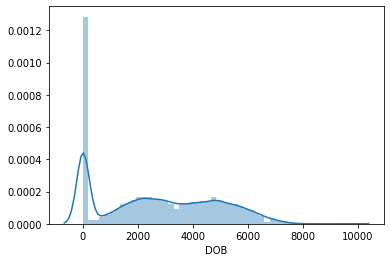

In [66]:
sns.distplot(numerical['DOB'])

In [67]:
numerical['DOB'].value_counts(sort=True).reset_index()

,index,DOB
0,0,23661
1,4801,1479
2,5001,1326
3,3001,1288
4,2801,1225
...,...,...
942,7307,1
943,9502,1
944,9612,1
945,9009,1


# Lesson 3

Now let's study the numerical columns and see how many missing values they have

In [68]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [69]:
numerical.shape

(95412, 335)

In [70]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


Let's fill the missing values in the 'AGE' column by the mean of the age

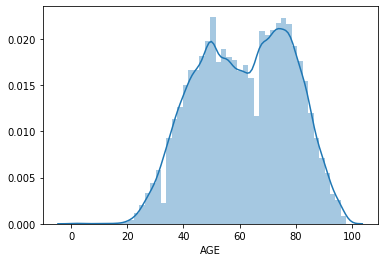

In [71]:
sns.distplot(numerical['AGE'])
plt.show()

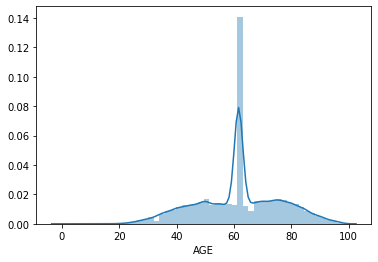

In [72]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
sns.distplot(numerical['AGE'])
plt.show()

Let's go with 'INCOME' column.

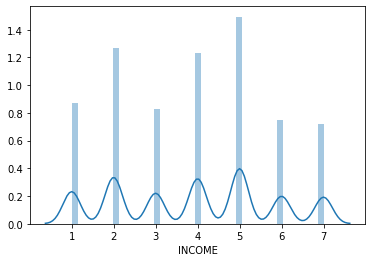

In [73]:
sns.distplot(numerical[numerical['INCOME'].isna()==False]['INCOME']) 
plt.show()

Clearly, this is impossible 'INCOME' doesn't have jumps it's continuos. This variable is actually categorical. We can verify it by using value_counts()

In [74]:
numerical['INCOME'].value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

We need to make it categorical and impute the missing values with the most frequent value.

In [75]:
numerical['INCOME'] = numerical['INCOME'].astype('object')

In [76]:
numerical['INCOME'].value_counts(sorted).reset_index()

,index,INCOME
0,5.0,0.208442
1,2.0,0.176915
2,4.0,0.171762
3,1.0,0.121712
4,3.0,0.115452
5,6.0,0.104929
6,7.0,0.100788


In [77]:
most = numerical['INCOME'].value_counts(sorted).reset_index().iloc[0,0]

In [78]:
numerical['INCOME'] = numerical['INCOME'].fillna(most)

Let's go with 'CLUsTER2' column.

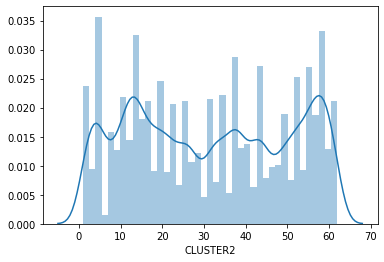

In [79]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

Now let's impute the missing values.

In [80]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

## Activity

* Check if there are any other null values in the numerical data
* Clean the columns "WEALTH2" and "TIMELAG".

Use appropriate method to fill the null values in these columns

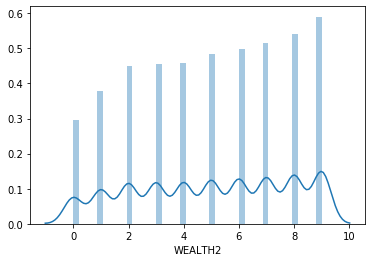

In [81]:
sns.distplot(numerical[numerical['WEALTH2'].isna()==False]['WEALTH2']) 
plt.show()

In [82]:
numerical['WEALTH2'].value_counts()

9.0    6523
8.0    5975
7.0    5684
6.0    5497
5.0    5351
4.0    5074
3.0    5046
2.0    4971
1.0    4191
0.0    3277
Name: WEALTH2, dtype: int64

In [83]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')

In [84]:
numerical['WEALTH2'].value_counts(sorted).reset_index()

,index,WEALTH2
0,9.0,0.126442
1,8.0,0.115819
2,7.0,0.110179
3,6.0,0.106554
4,5.0,0.103724
5,4.0,0.098354
6,3.0,0.097812
7,2.0,0.096358
8,1.0,0.081238
9,0.0,0.063521


In [85]:
most = numerical['WEALTH2'].value_counts(sorted).reset_index().iloc[0,0]

In [86]:
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(most)

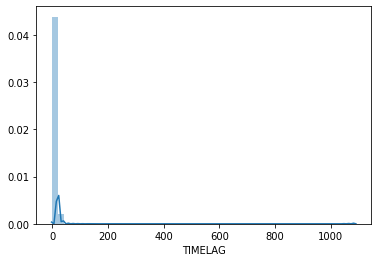

In [87]:
sns.distplot(numerical[numerical['TIMELAG'].isna()==False]['TIMELAG']) 
plt.show()

In [88]:
numerical['TIMELAG'].value_counts()

5.0      8584
4.0      8490
3.0      8485
6.0      6648
2.0      6275
         ... 
89.0        1
90.0        1
442.0       1
58.0        1
77.0        1
Name: TIMELAG, Length: 68, dtype: int64

In [89]:
numerical['TIMELAG'] = numerical['TIMELAG'].astype('object')

In [90]:
numerical['TIMELAG'].value_counts(sorted).reset_index()

,index,TIMELAG
0,5.0,0.100469
1,4.0,0.099369
2,3.0,0.099311
3,6.0,0.077810
4,2.0,0.073444
...,...,...
63,61.0,0.000012
64,58.0,0.000012
65,55.0,0.000012
66,53.0,0.000012


In [91]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(0)

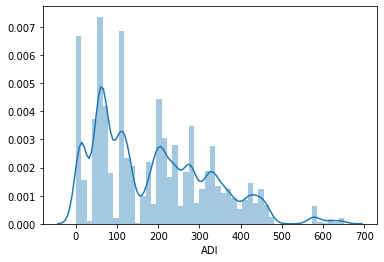

In [97]:
sns.distplot(numerical[numerical['ADI'].isna()==False]['ADI']) 
plt.show()

In [98]:
numerical['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
601.0       1
147.0       1
161.0       1
103.0       1
Name: ADI, Length: 204, dtype: int64

In [99]:
numerical['ADI'] = numerical['ADI'].astype('object')

In [100]:
numerical['ADI'].value_counts(sorted).reset_index()

,index,ADI
0,13.0,0.076574
1,51.0,0.048510
2,65.0,0.039515
3,57.0,0.029765
4,105.0,0.027466
...,...,...
199,601.0,0.000010
200,103.0,0.000010
201,161.0,0.000010
202,147.0,0.000010


In [101]:
most = numerical['ADI'].value_counts(sorted).reset_index().iloc[0,0]

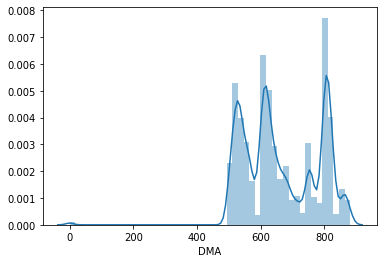

In [103]:
sns.distplot(numerical[numerical['DMA'].isna()==False]['DMA']) 
plt.show()

In [104]:
numerical['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
552.0       1
584.0       1
516.0       1
554.0       1
Name: DMA, Length: 206, dtype: int64

In [105]:
numerical['DMA'] = numerical['DMA'].astype('object')

In [106]:
numerical['DMA'].value_counts(sorted).reset_index()

,index,DMA
0,803.0,0.076574
1,602.0,0.048615
2,807.0,0.039515
3,505.0,0.029796
4,819.0,0.027162
...,...,...
201,552.0,0.000010
202,554.0,0.000010
203,569.0,0.000010
204,584.0,0.000010


In [107]:
most = numerical['DMA'].value_counts(sorted).reset_index().iloc[0,0]

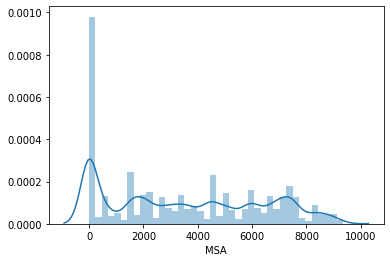

In [109]:
sns.distplot(numerical[numerical['MSA'].isna()==False]['MSA']) 
plt.show()

In [110]:
numerical['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
3180.0        1
6323.0        1
9280.0        1
743.0         1
960.0         1
Name: MSA, Length: 298, dtype: int64

In [111]:
numerical['MSA'] = numerical['MSA'].astype('object')

In [112]:
numerical['MSA'].value_counts(sorted).reset_index()

,index,MSA
0,0.0,0.223898
1,4480.0,0.048342
2,1600.0,0.042601
3,2160.0,0.027141
4,520.0,0.017685
...,...,...
293,8480.0,0.000010
294,1950.0,0.000010
295,1320.0,0.000010
296,3180.0,0.000010


In [113]:
most = numerical['MSA'].value_counts(sorted).reset_index().iloc[0,0]

In [115]:
numerical = numerical.drop(columns =cols_to_drop_n)

In [118]:
#categorical = categorical.drop(columns =cols_to_drop, axis=1)

# Lesson 4

## Lab

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

Check for null values in the numerical columns. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

Use appropriate EDA technique whereever necessary.

Let's go with 'WEALHT1'

In [ ]:
numerical['WEALTH1'].value_counts()

In [ ]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object') 

In [ ]:
numerical['WEALTH1'].value_counts(sorted).reset_index()

In [ ]:
most = numerical['WEALTH1'].value_counts(sorted).reset_index().iloc[0,0]

In [ ]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(most)

Now 'GEOCODE2'

In [ ]:
categorical['GEOCODE2'].value_counts()

In [ ]:
most = categorical['GEOCODE2'].value_counts(sorted).reset_index().iloc[0,0]

In [ ]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna(most)

Now ADI

In [ ]:
sns.distplot(numerical[numerical['ADI'].isna()==False]['ADI']) 
plt.show()

In [ ]:
numerical['ADI'] = numerical['ADI'].fillna(np.mean(numerical['ADI']))

Now DMA

In [ ]:
sns.distplot(numerical[numerical['DMA'].isna()==False]['DMA']) 
plt.show()

In [ ]:
numerical['DMA'] = numerical['DMA'].fillna(np.mean(numerical['DMA']))

Finally MSA

In [ ]:
sns.distplot(numerical[numerical['MSA'].isna()==False]['MSA']) 
plt.show()

In [ ]:
numerical['MSA'] = numerical['MSA'].fillna(np.mean(numerical['MSA']))

We drop 'NEXTDATE'

In [ ]:
numerical.drop(columns ='NEXTDATE', axis=1, inplace=True)

## Saving data

In [ ]:
numerical.to_csv('/content/drive/My Drive/UNIT7/DAY1/Afternoon/numerical.csv')
categorical.to_csv('/content/drive/My Drive/UNIT7/DAY1/Afternoon/categorical.csv')
Y.to_csv('/content/drive/My Drive/UNIT7/DAY1/Afternoon/target.csv')